### Build the dataset
- Undersampling the majority class to balance the dataset (to 3500 images each)


In [13]:
import os
import shutil
import random

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

SEED = 42
random.seed(SEED)

RAW_DATA_PATH = "/shared_storage/ailab/gc/merged_filter_dups"
NUM_IMAGES_PER_CLASS = 2800

In [2]:
# class names
class_names = sorted(os.listdir(RAW_DATA_PATH))
print(class_names)

class_dis = [len(os.listdir(RAW_DATA_PATH + f"/{name}")) for name in class_names]
print(class_dis)

['battery', 'biological', 'cardboard_paper', 'clothes', 'glass', 'metal', 'plastic', 'shoes', 'trash']
[1055, 5653, 9989, 5323, 8218, 3540, 4120, 2114, 864]


/tmp/ipykernel_2059736/2445126286.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


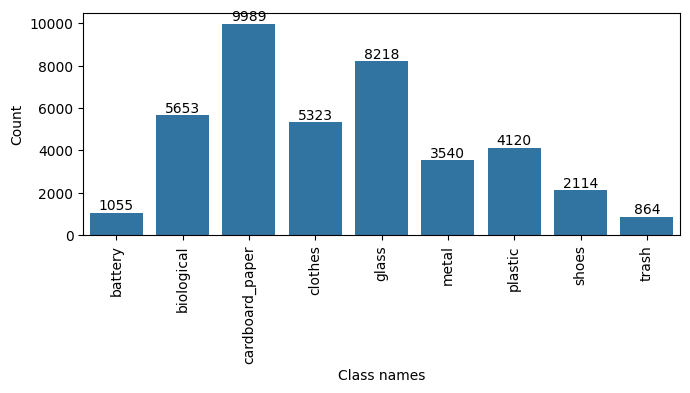

In [3]:
DF = pd.DataFrame(columns=['Class names','Count'])
DF['Class names']=class_names
DF['Count']=class_dis
plt.figure(figsize=(7,4))
ax=sns.barplot(x='Class names', y='Count', data=DF)
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()

### Only keep images with squared size (longer side / shorter side < 1.25)

In [6]:
FILTER_RATIO_PATH = "/shared_storage/ailab/gc/filter_ratio"
os.makedirs(FILTER_RATIO_PATH, exist_ok=True)

for class_name in class_names:
    os.makedirs(FILTER_RATIO_PATH + f"/{class_name}", exist_ok=True)

for class_name in class_names:
    print(f"Processing {class_name}")
    class_path = RAW_DATA_PATH + f"/{class_name}"
    images = os.listdir(class_path)
    for image in images:
        # check width and height
        image_path = class_path + f"/{image}"
        img = Image.open(image_path)
        width, height = img.size
        longer_side = max(width, height)
        shorter_side = min(width, height)
        ratio = longer_side / shorter_side
        if ratio < 1.25:
            shutil.copy(image_path, FILTER_RATIO_PATH + f"/{class_name}/{image}")
        

Processing battery
Processing biological
Processing cardboard_paper
Processing clothes
Processing glass
Processing metal
Processing plastic
Processing shoes
Processing trash


['battery', 'biological', 'cardboard_paper', 'clothes', 'glass', 'metal', 'plastic', 'shoes', 'trash']
[595, 4834, 7514, 678, 6466, 2859, 2791, 648, 432]


/tmp/ipykernel_2059736/379230120.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


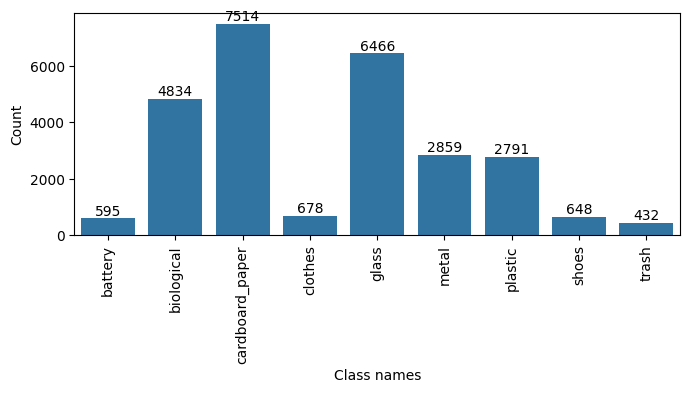

In [7]:
# class names
class_names = sorted(os.listdir(FILTER_RATIO_PATH))
print(class_names)
class_dis = [len(os.listdir(FILTER_RATIO_PATH + f"/{name}")) for name in class_names]
print(class_dis)
DF = pd.DataFrame(columns=['Class names','Count'])
DF['Class names']=class_names
DF['Count']=class_dis
plt.figure(figsize=(7,4))
ax=sns.barplot(x='Class names', y='Count', data=DF)
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()

### Under-sampling and copy the images to the new dataset

In [14]:
RAW_DATA_PATH = FILTER_RATIO_PATH
OUTPUT_PATH = "/shared_storage/ailab/gc/data"
os.makedirs(OUTPUT_PATH, exist_ok=True)

final_class_names = ["cardboard_paper", "metal", "plastic", "glass", "others"]
for name in final_class_names:
    os.makedirs(OUTPUT_PATH + f"/{name}", exist_ok=True)

In [15]:
# just copy images from `{RAW_DATA_PATH}/{class_name}` and copy to `{OUTPUT_PATH}/{class_name}`
# for class_names [""metal", "plastic"]
for class_name in ["metal", "plastic"]:
    print(class_name)
    files = os.listdir(RAW_DATA_PATH + f"/{class_name}")
    for file in files:
        shutil.copy(RAW_DATA_PATH + f"/{class_name}/{file}", OUTPUT_PATH + f"/{class_name}")

# random sampling NUM_IMAGES_PER_CLASS images from `{RAW_DATA_PATH}/{class_name}` and copy to `{OUTPUT_PATH}/{class_name}`
# for class_names ["glass", "cardboard_paper"]
for class_name in ["glass", "cardboard_paper"]:
    print(class_name)
    files = os.listdir(RAW_DATA_PATH + f"/{class_name}")
    random.shuffle(files)
    for i in range(NUM_IMAGES_PER_CLASS):
        shutil.copy(RAW_DATA_PATH + f"/{class_name}/{files[i]}", OUTPUT_PATH + f"/{class_name}")

# final `others` class will include images from `battery`, `biological`, `clothes`, `shoes`, `trash`
print("others")
other_class_names = ["battery", "biological", "clothes", "shoes", "trash"]
print(NUM_IMAGES_PER_CLASS / len(other_class_names))
for class_name in other_class_names:
    files = os.listdir(RAW_DATA_PATH + f"/{class_name}")
    random.shuffle(files)
    for i in range(min(int(NUM_IMAGES_PER_CLASS / len(other_class_names)), len(files))):
        shutil.copy(RAW_DATA_PATH + f"/{class_name}/{files[i]}", OUTPUT_PATH + "/others")

metal
plastic
glass
cardboard_paper
others
560.0


['cardboard_paper', 'glass', 'metal', 'others', 'plastic']
[2800, 2800, 2859, 2672, 2791]


/tmp/ipykernel_2059736/532481081.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


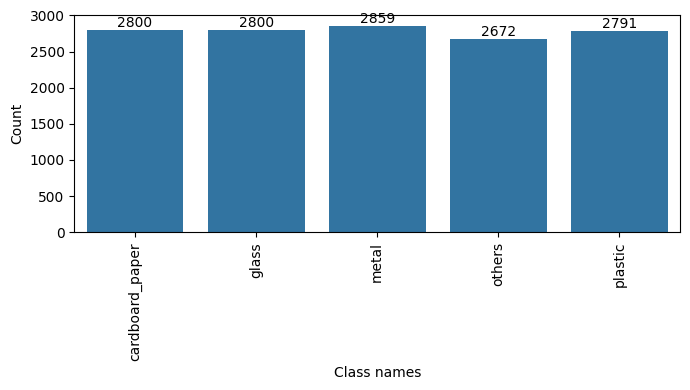

In [16]:
# class names
class_names = sorted(os.listdir(OUTPUT_PATH))
print(class_names)

class_dis = [len(os.listdir(OUTPUT_PATH + f"/{name}")) for name in class_names]
print(class_dis)

DF = pd.DataFrame(columns=['Class names','Count'])
DF['Class names']=class_names
DF['Count']=class_dis
plt.figure(figsize=(7,4))
ax=sns.barplot(x='Class names', y='Count', data=DF)
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()

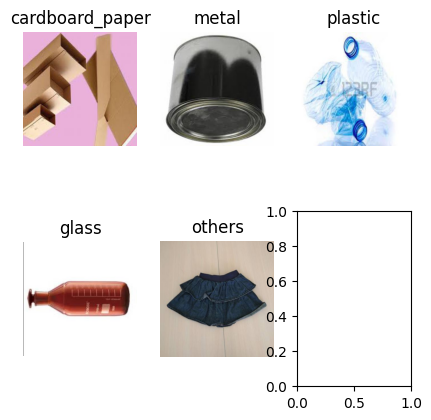

In [20]:
fig, axes = plt.subplots(2, 3, figsize = (5,5))
axes = axes.ravel() 

for i, category in enumerate(final_class_names): 

    class_dir = os.path.join(OUTPUT_PATH, category)

    image = random.choice(os.listdir(class_dir))
 
    img = plt.imread(os.path.join(class_dir,image))
    axes[i].imshow( img )
    axes[i].set_title(category) 
    axes[i].axis('off')

In [21]:
# find the average width and height of images in the entire dataset.
width = []
height = []
from PIL import Image
import numpy as np

for category in os.listdir(OUTPUT_PATH + '/'):
    for image in os.listdir(OUTPUT_PATH + '/' + category):
        img = Image.open(OUTPUT_PATH + '/' + category + '/' + image)
        width.append(img.width)
        height.append(img.height)

print('Mean width: {:.4f}'.format(np.mean(width)))
print('Mean Height: {:.4f}'.format(np.mean(height)))

Mean width: 394.2966
Mean Height: 394.9866


### Data splitting (train, val, test)

In [22]:
import splitfolders

splitfolders.ratio("/shared_storage/ailab/gc/data", output = 'data_split', seed = SEED, ratio = (.8,.1,.1), group_prefix = None)

/tmp/ipykernel_2059736/2981025705.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_2059736/2981025705.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_2059736/2981025705.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


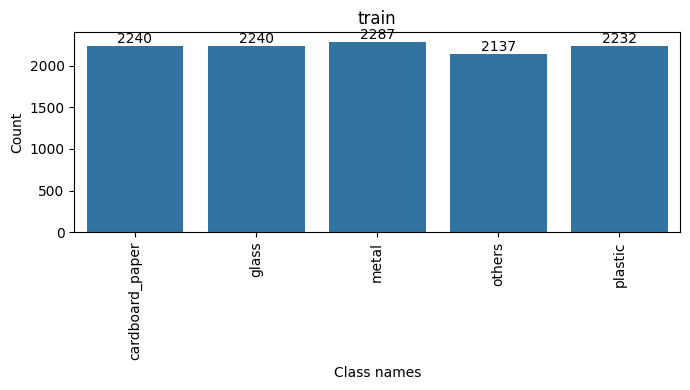

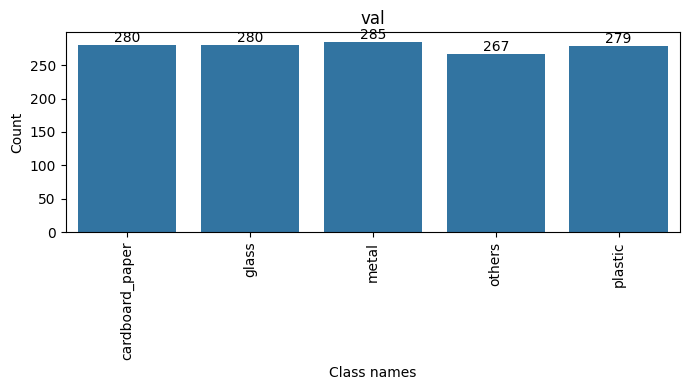

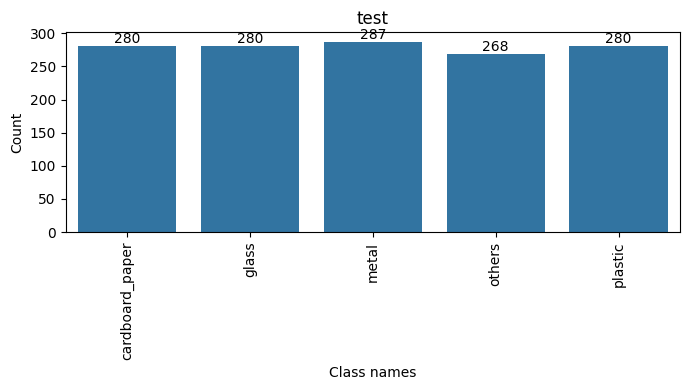

In [23]:
# class names
split_names = ['train', 'val', 'test']
for split_name in split_names:
    data_path = f"data_split/{split_name}"
    class_names = sorted(os.listdir(data_path))
    class_dis = [len(os.listdir(data_path + f"/{name}")) for name in class_names]

    DF = pd.DataFrame(columns=['Class names','Count'])
    DF['Class names']=class_names
    DF['Count']=class_dis
    plt.figure(figsize=(7,4))
    ax=sns.barplot(x='Class names', y='Count', data=DF)
    # set title
    ax.set_title(split_name)
    ax.bar_label(ax.containers[0])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.tight_layout()

Image size: (394, 394)
Data augmentation: 
- crops, horizontal flips, and vertical flips,
- data_augmentation = tf.keras.Sequential([tf.keras.layers.RandomFlip("horizontal"),
                                         tf.keras.layers.RandomRotation(0.2), 
                                         tf.keras.layers.RandomZoom(0.2),
                                         tf.keras.layers.RandomHeight(0.2),
                                         tf.keras.layers.RandomWidth(0.2),],
                                         name ="data_augmentation")